In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [6]:
import re
import string

In [7]:
data["tweet"].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

Convert Uppercase To Lowercase

In [8]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


Remove Links

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [11]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


Remove Punctuation

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [14]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [15]:
data.tail()

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


Remove Numbers

In [16]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)

In [17]:
data.tail()

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


Remove Stopwords

In [18]:
!pip install nltk

You should consider upgrading via the '/Users/malisharasiru/Desktop/sentiment_analysis_project/env/bin/python3 -m pip install --upgrade pip' command.


In [19]:
import nltk

In [20]:
nltk.download('stopwords', download_dir='../static/model/')

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
with open ('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [24]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
vocab

Counter()

In [31]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [32]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [33]:
len(vocab)

15949

In [34]:
data.shape

(7920, 3)

In [35]:
tokens = [key for key in vocab if vocab[key] > 10]

In [36]:
len(tokens)

1145

In [37]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [43]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Devide Dataset

In [44]:
x = data["tweet"]
y = data["label"]

In [45]:
!pip install scikit-learn

     |████████████████████████████████| 9.5 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 29.7 MB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/malisharasiru/Desktop/sentiment_analysis_project/env/bin/python3 -m pip install --upgrade pip' command.


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
x_train.shape

(6336,)

In [49]:
x_test.shape

(1584,)

### Vectorization

In [50]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [54]:
vectorized_x_train = vectorizer(x_train, tokens)

In [55]:
vectorized_x_test = vectorizer(x_test, tokens)

In [56]:
y_train.value_counts()

label
0    4701
1    1635
Name: count, dtype: int64

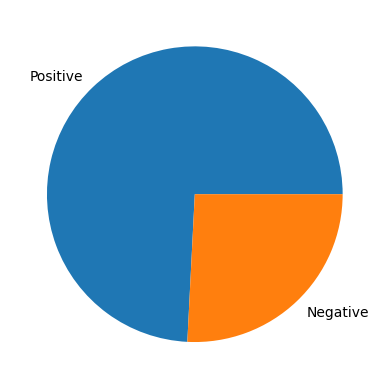

In [57]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle Imbalanced Dataset

In [59]:
!pip install imbalanced-learn

     |████████████████████████████████| 235 kB 433 kB/s eta 0:00:01
You should consider upgrading via the '/Users/malisharasiru/Desktop/sentiment_analysis_project/env/bin/python3 -m pip install --upgrade pip' command.


In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9402, 1145) (9402,)


In [61]:
y_train_smote.value_counts()

label
0    4701
1    4701
Name: count, dtype: int64

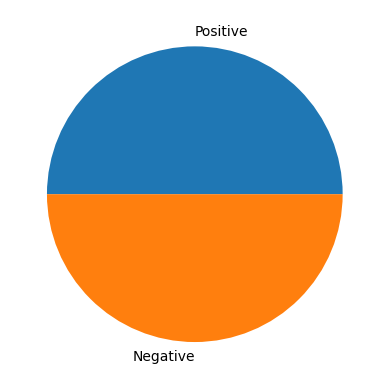

In [63]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### From Following Stuff can Train a Module

In [64]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9397    1
9398    1
9399    1
9400    1
9401    1
Name: label, Length: 9402, dtype: int64

In [66]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
y_test

19      1
6496    1
6936    1
5614    0
3479    0
       ..
6439    0
5477    1
1636    1
2763    0
6514    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [73]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.942
	Precision = 0.915
	Recall = 0.975
	F1-Score = 0.944
Testing Scores:
	Accuracy = 0.881
	Precision = 0.716
	Recall = 0.857
	F1-Score = 0.78


### Naive Bayes

In [74]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.91
	Precision = 0.871
	Recall = 0.961
	F1-Score = 0.914
Testing Scores:
	Accuracy = 0.866
	Precision = 0.669
	Recall = 0.908
	F1-Score = 0.77


### Decision Tree

In [75]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.835
	Precision = 0.672
	Recall = 0.65
	F1-Score = 0.661


### Random Forest

In [76]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.875
	Precision = 0.748
	Recall = 0.744
	F1-Score = 0.746


### Support Vector Machine

In [77]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.996
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.891
	Precision = 0.753
	Recall = 0.829
	F1-Score = 0.789


In [78]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)